In [1]:
!pip install torchaudio

ERROR: Could not find a version that satisfies the requirement torchaudio (from versions: none)
ERROR: No matching distribution found for torchaudio
You should consider upgrading via the 'c:\users\vadim\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [34]:
import torch
import torchaudio
import matplotlib.pyplot as plt

Opening a dataset
-----------------

mkdir: cannot create directory ‘data’: File exists
Shape of waveform: torch.Size([2, 276858])
Sample rate of waveform: 44100


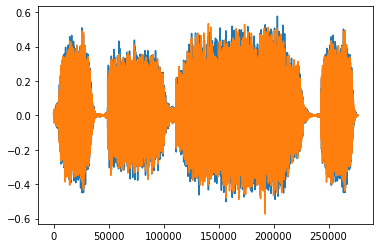

In [35]:
import requests

url = "https://pytorch.org/tutorials//_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav"
r = requests.get(url)
!mkdir 'data'
with open('data/steam-train-whistle-daniel_simon-converted-from-mp3.wav', 'wb') as f:
    f.write(r.content)

filename = "data/steam-train-whistle-daniel_simon-converted-from-mp3.wav"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

In [48]:
waveform[1][0].item()

-0.003753662109375

Transformations
---------------

torchaudio supports a growing list of
`transformations <https://pytorch.org/audio/transforms.html>`_.

-  **Resample**: Resample waveform to a different sample rate.
-  **Spectrogram**: Create a spectrogram from a waveform.
-  **MelScale**: This turns a normal STFT into a Mel-frequency STFT,
   using a conversion matrix.
-  **AmplitudeToDB**: This turns a spectrogram from the
   power/amplitude scale to the decibel scale.
-  **MFCC**: Create the Mel-frequency cepstrum coefficients from a
   waveform.
-  **MelSpectrogram**: Create MEL Spectrograms from a waveform using the
   STFT function in PyTorch.
-  **MuLawEncoding**: Encode waveform based on mu-law companding.
-  **MuLawDecoding**: Decode mu-law encoded waveform.

Since all transforms are nn.Modules or jit.ScriptModules, they can be
used as part of a neural network at any point.

To start, we can look at the log of the spectrogram on a log scale.

Or we can look at the Mel Spectrogram on a log scale.

Shape of spectrogram: torch.Size([2, 128, 1385])


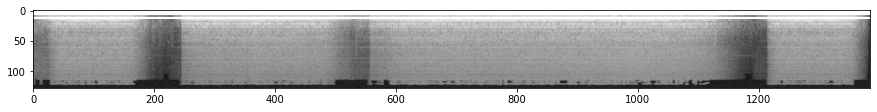

In [38]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(15,9))
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

Min of waveform: -0.572845458984375
Max of waveform: 0.575958251953125
Mean of waveform: 9.293758921558037e-05
Shape of transformed waveform: torch.Size([2, 276858])


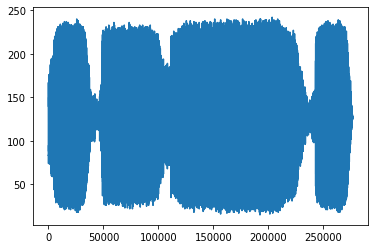

In [49]:
# Let's check if the tensor is in the interval [-1,1]
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(), waveform.max(), waveform.mean()))

# Let’s apply encode the waveform.
transformed = torchaudio.transforms.MuLawEncoding()(waveform)

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

# 2. WAVERNN
-  WaveRNN architecture takes as input the previous audio sample $s_{t−1}$ , along with conditioning parameters f
- generates a discrete probability distribution $P (s_t$ ) for the output sample
-  The WaveRNN model consists of a gated recurrent unit (GRU), followed by two fully-connected layers, ending in a softmax activation.

In [ ]:
OUTPUT_SIZE = 256

In [ ]:
class WaveRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(WaveRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)